# Experiment 003: *Short facts

In [1]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from matplotlib import pyplot as plt     # plotting methods within notebook
from scipy import stats                  # lots of statistical methods
import pandas as pd
%matplobtlib inline

UsageError: Line magic function `%matplobtlib` not found.


In [2]:
import os
os.chdir('../')


from src.get_data import get_data
from src.get_data_tracks import get_data_tracks

## Hypothesis:

We want to get short facts about the playlists, like for example:
- What is the average playlist length (tracks and duration)
- What is the number of unique tracks?
- What is the number of unique albums?
- What is the number of unique artists?
- What is the most common playlist name?

## What is the average playlist length (tracks and duration):
### 1. duration

In [30]:
dataset = get_data(pre=True)
dataset

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,EDM,false,19995,1417824000,18,14,1,"[{'pos': 0, 'artist_name': 'Calvin Harris', 't...",2,4614171,11,NaN
19996,christmas 2014,false,19996,1449360000,24,24,1,"[{'pos': 0, 'artist_name': 'Brenda Lee', 'trac...",5,4675554,23,NaN
19997,Metal,false,19997,1495670400,106,24,2,"[{'pos': 0, 'artist_name': 'Decapitated', 'tra...",9,28912970,11,NaN
19998,oldie,false,19998,1506816000,36,31,1,"[{'pos': 0, 'artist_name': 'Diddy', 'track_uri...",16,9374114,26,NaN


In [20]:
total_duration = dataset['duration_ms'].sum()
average_duration = total_duration/len(dataset)
print(f'total_duration= {total_duration}, average_duration= {average_duration}')

total_duration= 312852249696, average_duration= 15642612.4848


In [25]:
def convert_ms(ms:float) -> str:
    duration = datetime.timedelta(milliseconds=ms)
    return f'{duration.hours}:{duration.minutes}:{duration.seconds}'

In [28]:
print(f'total_duration= {convert(total_duration)}, average_duration= {convert(average_duration)} (hours:minutes:seconds)')

total_duration= 23:24:9, average_duration= 4:20:42 (hours:minutes:seconds)


### 2. tracks

In [29]:
dataset = get_data(pre=True)

In [32]:
total_tracks = dataset['num_tracks'].sum()
average_tracks = total_tracks/len(dataset)
print(f'total_tracks= {total_tracks}, average_tracks= {average_tracks}')

total_tracks= 1333407, average_tracks= 66.67035


### 3.a Graph the change of the average_tracks

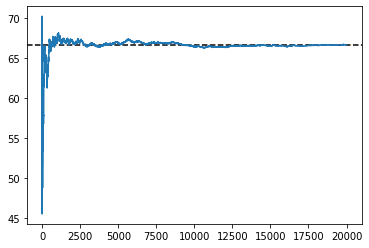

In [61]:
average_tracks_timeline = []
total_tracks = 0
i = 0
for num_tracks in dataset['num_tracks']:
    i += 1
    total_tracks += num_tracks
    average_tracks_timeline.append(total_tracks/i)
mu = dataset['num_tracks'].mean()
plt.axhline(y=mu, color = 'black', linestyle = '--')
plt.plot(average_tracks_timeline)

### 3.b Graph the change of the average_duration

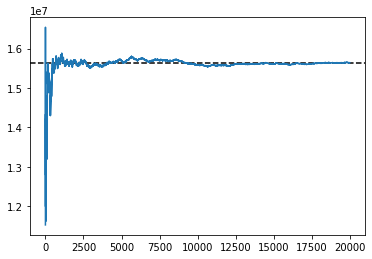

In [59]:
average_duration_timeline = []
total_duration = 0
i = 0
for duration_s in dataset['duration_ms']:
    i += 1
    total_duration += duration_s
    average_duration_timeline.append(total_duration/i)
mu = dataset['duration_ms'].mean()
plt.axhline(y=mu, color = 'black', linestyle = '--')
plt.plot(average_duration_timeline)

# [ ] konfidenzintervall? -> verteilung ja nicht klar???!!!


#### Note:
Gesetz der großen Zahlen!!

### 4.a Distribution of the duration

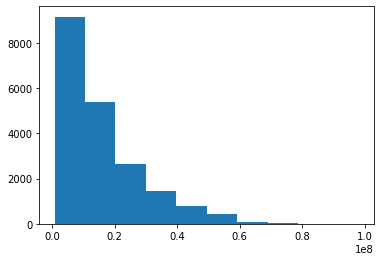

In [57]:
plt.hist(dataset['duration_ms'])
plt.show()

### 4.b Distribution of the track number

Idea: Weibull-distribution

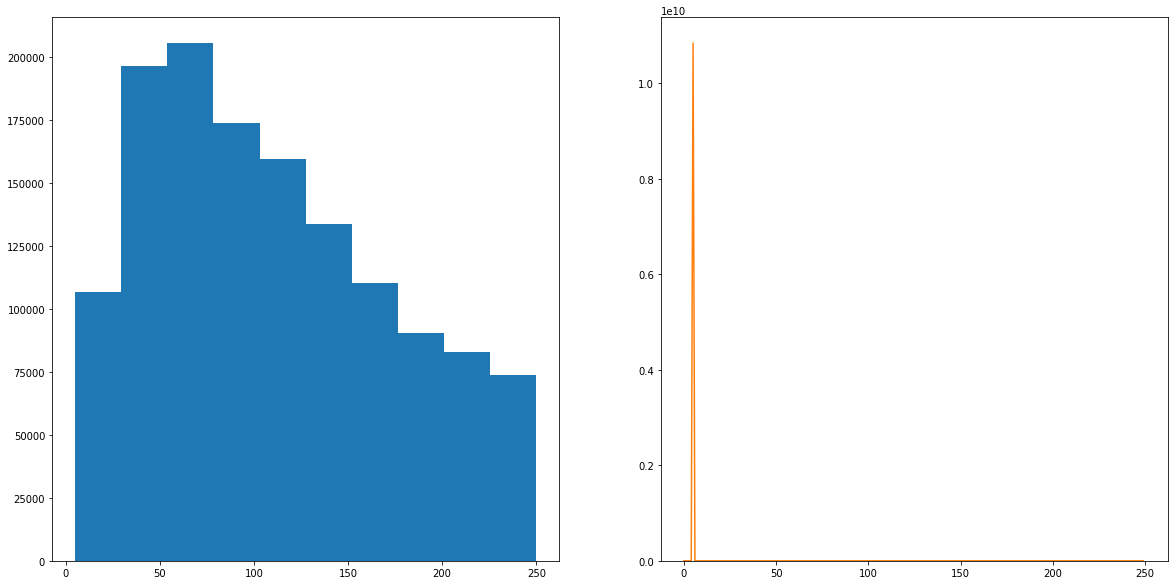

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(dataset['num_tracks'])
axs[1].hist(dataset['num_tracks'], density=True)
#alpha, k, _, _ = stats.exponweib.fit(dataset['num_tracks'])
xgrid = np.arange(250)
#axs[1].plot(xgrid, stats.exponweib(alpha, k).pdf(xgrid))
#alpha, k, _= stats.weibull_max.fit(dataset['num_tracks'])
#axs[1].plot(xgrid, stats.weibull_max(alpha, k).pdf(xgrid))
alpha, k, _= stats.weibull_min.fit(dataset['num_tracks'])
axs[1].plot(xgrid, stats.weibull_min(alpha, k).pdf(xgrid))

plt.show()

(2.7967910692247244, 1.1281423315424424, -8.898925997047229, 72.72991327365673)


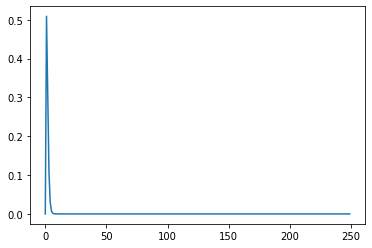

In [108]:
print(weilbulldistr)
xgrid = np.arange(250)
plt.plot(xgrid, stats.exponweib(weilbulldistr[0], weilbulldistr[1]).pdf(xgrid))
plt.show()

Idea: Pareto distribution

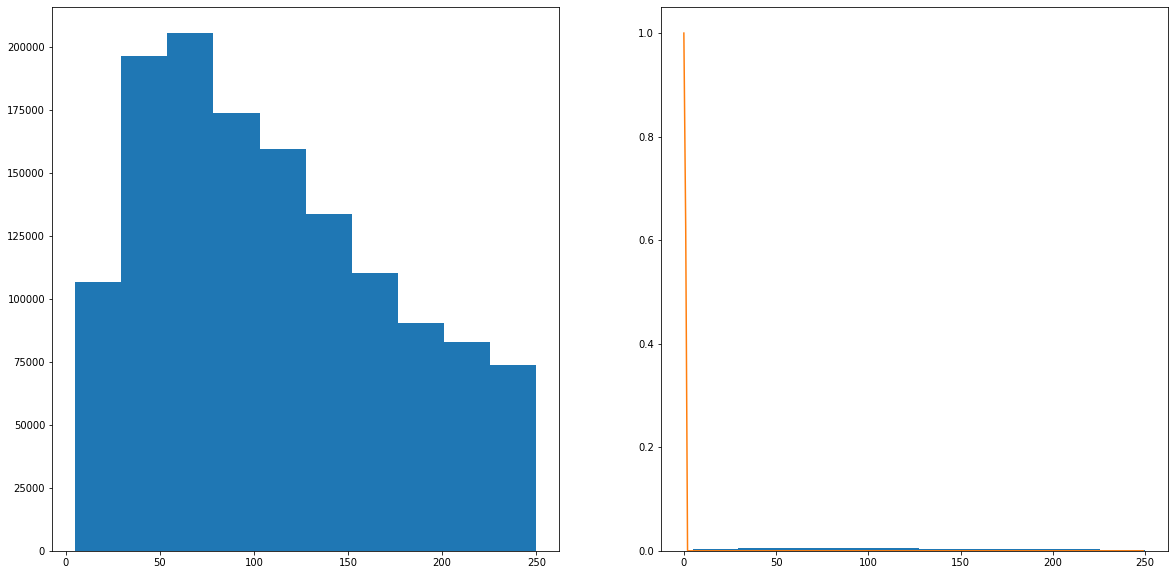

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(dataset['num_tracks'])
axs[1].hist(dataset['num_tracks'], density=True)
#alpha, k, _, _ = stats.exponweib.fit(dataset['num_tracks'])
xgrid = np.arange(250)
c, _ , _ = stats.genpareto.fit(dataset['num_tracks'])
len(dist)
axs[1].plot(xgrid, stats.genpareto(c).pdf(xgrid))

plt.show()

Idea: chi2

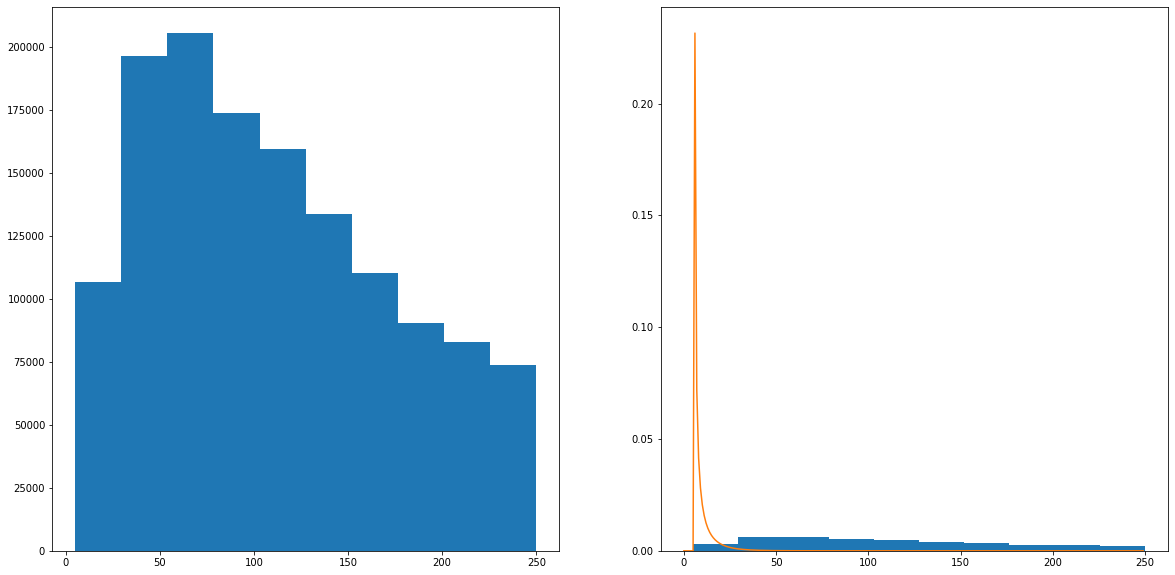

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(dataset['num_tracks'])
axs[1].hist(dataset['num_tracks'], density=True)
#alpha, k, _, _ = stats.exponweib.fit(dataset['num_tracks'])
xgrid = np.arange(250)
df, _ , _ = stats.chi2.fit(dataset['num_tracks'])
axs[1].plot(xgrid, stats.chi2(df, _, _).pdf(xgrid))

plt.show()

## What is the number of unique tracks?:

In [86]:
dataset = get_data_tracks(pre=True)

In [87]:
dataset

artist_name  \
pid   name       num_tracks num_albums num_followers num_artists pos                      
0     Throwbacks 52         47         1             37          0        Missy Elliott   
                                                                 1       Britney Spears   
                                                                 2              Beyoncé   
                                                                 3    Justin Timberlake   
                                                                 4               Shaggy   
...                                                                                 ...   
19999 flow       10         10         1             9           5             Coldplay   
                                                                 6           Ed Sheeran   
                                                                 7         Grizzly Bear   
                                                                 8       Perfume Genius   
                                                                 9               Tennis   

                                                                                                 track_uri  \
pid   name       num_tracks num_albums num_followers num_artists pos                                         
0     Throwbacks 52         47         1             37          0    spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
                                                                 1    spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
                                                                 2    spotify:track:0WqIKmW4BTrj3eJFmnCKMv   
                                                                 3    spotify:track:1AWQoqb9bSvzTjaLralEkT   
                                                                 4    spotify:track:1lzr43nnXAijIGYnCT8M8H   
...                                                                                                    ...   
19999 flow       10         10         1             9           5    spotify:track:7D0RhFcb3CrfPuTJ0obrod   
                                                                 6    spotify:track:51ChrwmUPDJvedPQnIU8Ls   
                                                                 7    spotify:track:0iTpQYzJnYgh7kIxyq8A2O   
                                                                 8    spotify:track:3Gda1sTo2ZjbztjjsnAsP3   
                                                                 9    spotify:track:79sKMNtZ3Q4UOxPZ6BSfm9   

                                                                                                 artist_uri  \
pid   name       num_tracks num_albums num_followers num_artists pos                                          
0     Throwbacks 52         47         1             37          0    spotify:artist:2wIVse2owClT7go1WT98tk   
                                                                 1    spotify:artist:26dSoYclwsYLMAKD3tpOr4   
                                                                 2    spotify:artist:6vWDO969PvNqNYHIOW5v0m   
                                                                 3    spotify:artist:31TPClRtHm23RisEBtV3X7   
                                                                 4    spotify:artist:5EvFsr3kj42KNv97ZEnqij   
...                                                                                                     ...   
19999 flow       10         10         1             9           5    spotify:artist:4gzpq5DPGxSnKTe4SA8HAU   
                                                                 6    spotify:artist:6eUKZXaKkcviH0Ku9w2n3V   
                                                                 7    spotify:artist:2Jv5eshHtLycR6R8KQCdc4   
                                                                 8    spotify:artist:2ueoLVCXQ948OfhVvAy3Nn   
                                                                 9    spotify:artist:1ybAN3utgdoUL1MUCtH4QM   

                 

In [91]:
num_total_tracks = len(dataset['track_uri'])
#num_unique_tracks = len(dataset['track_uri'].unique())
num_unique_tracks = dataset['track_uri'].nunique()
ratio_playlist_unique_tracks = len(dataset.index)/num_unique_tracks
print(f'the total number of tracks: {num_total_tracks}, \nthe number of unique tracks: {num_unique_tracks}, \nthe ratio of unique tracks per playlist: {ratio_playlist_unique_tracks}')

the total number of tracks: 1333407, 
the number of unique tracks: 263469, 
the ratio of unique tracks per playlist: 5.0609635289161155


### Idea:
cumulative number of unique tracks as function -> hypothesis: there is a logarithmic function (later added playlist have no/nearly no effect) alternative linear function (with every playlist comes (round about) 2 new/unique tracks

In [89]:
dataset = dataset.reset_index()

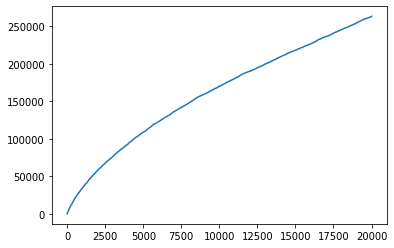

In [90]:
cum_unique_tracks = []
total_tracks = []
# note:
# plt.plot(dataset['track_uri'].cumsum()) 
# print(tmp.cumsum()) #numpy.cumsum()
#use (both) full ram -> no chance to use

#tmp = dataset['track_uri'].to_numpy()
#for i in range(len(tmp)):
    #cum_unique_tracks.append(len(np.unique(tmp[:i+1])))

#dataset = dataset.reset_index()
dataset_groups = dataset.groupby(['pid', 'name', 'num_tracks', 'num_albums', 'num_followers', 'num_artists'])

for group in dataset_groups:
    #print(group[1]['track_uri'])
    total_tracks.extend(group[1]['track_uri'].to_numpy())
    cum_unique_tracks.append(len(np.unique(total_tracks)))
    
#plt.plot(cum_unique_tracks)
#plt.show()


In [ ]:
plt.plot(cum_unique_tracks)
plt.show()

In [ ]:
#17:08 -> 19:02??? (20,000 Playlists)

#idea ploting is own cell

### Idea:
Are there missmatches between uri and trackname?